In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import random
sns.set()
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("economy.csv")
set1,set2 = train_test_split(data, test_size = 0.3, random_state=0)
set1.to_csv("flightprice_1.csv", index=False)
set2.to_csv("flightprice_2.csv", index=True)
    
dataset = pd.read_csv("flightprice_1.csv")
unseen_data = pd.read_csv("flightprice_2.csv")
unseen_data.head()

,Unnamed: 0,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,195712,07-03-2022,AirAsia,I5,1531,22:00,Chennai,01h 30m,non-stop,23:30,Bangalore,"1,548"
1,57316,09-03-2022,Vistara,UK,865,19:10,Mumbai,01h 45m,non-stop,20:55,Bangalore,"2,074"
2,137222,24-02-2022,Indigo,6E,6021,13:55,Kolkata,06h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Bangalore,"6,977"
3,73857,08-03-2022,Vistara,UK,930,07:30,Mumbai,12h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,Hyderabad,"4,784"
4,66737,12-03-2022,SpiceJet,SG,455,15:30,Mumbai,05h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:25,Kolkata,"6,196"


In [3]:
pd.set_option('display.max_columns', None)

dataset.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,26-02-2022,Vistara,UK,858,06:40,Bangalore,16h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:50,Delhi,"7,104"
1,17-02-2022,Vistara,UK,977,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"6,060"
2,18-03-2022,Air India,AI,543,11:20,Hyderabad,07h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:00,Chennai,"4,229"
3,18-02-2022,Vistara,UK,880,13:25,Hyderabad,09h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:20,Bangalore,"11,319"
4,08-03-2022,Indigo,6E,5013,05:00,Mumbai,05h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,10:50,Kolkata,"5,843"


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144741 entries, 0 to 144740
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        144741 non-null  object
 1   airline     144741 non-null  object
 2   ch_code     144741 non-null  object
 3   num_code    144741 non-null  int64 
 4   dep_time    144741 non-null  object
 5   from        144741 non-null  object
 6   time_taken  144741 non-null  object
 7   stop        144741 non-null  object
 8   arr_time    144741 non-null  object
 9   to          144741 non-null  object
 10  price       144741 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.1+ MB


In [5]:
dataset.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [6]:
dataset.shape

(144741, 11)

In [7]:
unseen_data.shape

(62033, 12)

In [8]:
dataset["journey_day"] = pd.to_datetime(dataset.date, format="%d-%m-%Y").dt.day
dataset["journey_month"] = pd.to_datetime(dataset["date"], format = "%d-%m-%Y").dt.month
dataset.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,journey_day,journey_month
0,26-02-2022,Vistara,UK,858,06:40,Bangalore,16h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:50,Delhi,"7,104",26,2
1,17-02-2022,Vistara,UK,977,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"6,060",17,2
2,18-03-2022,Air India,AI,543,11:20,Hyderabad,07h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:00,Chennai,"4,229",18,3
3,18-02-2022,Vistara,UK,880,13:25,Hyderabad,09h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:20,Bangalore,"11,319",18,2
4,08-03-2022,Indigo,6E,5013,05:00,Mumbai,05h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,10:50,Kolkata,"5,843",8,3


In [9]:
unseen_data["journey_day"] = pd.to_datetime(unseen_data.date, format="%d-%m-%Y").dt.day
unseen_data["journey_month"] = pd.to_datetime(unseen_data["date"], format = "%d-%m-%Y").dt.month
unseen_data.head()

,Unnamed: 0,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,journey_day,journey_month
0,195712,07-03-2022,AirAsia,I5,1531,22:00,Chennai,01h 30m,non-stop,23:30,Bangalore,"1,548",7,3
1,57316,09-03-2022,Vistara,UK,865,19:10,Mumbai,01h 45m,non-stop,20:55,Bangalore,"2,074",9,3
2,137222,24-02-2022,Indigo,6E,6021,13:55,Kolkata,06h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Bangalore,"6,977",24,2
3,73857,08-03-2022,Vistara,UK,930,07:30,Mumbai,12h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,Hyderabad,"4,784",8,3
4,66737,12-03-2022,SpiceJet,SG,455,15:30,Mumbai,05h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:25,Kolkata,"6,196",12,3


In [10]:
dataset.drop(["date"], axis = 1, inplace = True)
dataset.head()

,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,journey_day,journey_month
0,Vistara,UK,858,06:40,Bangalore,16h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:50,Delhi,"7,104",26,2
1,Vistara,UK,977,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"6,060",17,2
2,Air India,AI,543,11:20,Hyderabad,07h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:00,Chennai,"4,229",18,3
3,Vistara,UK,880,13:25,Hyderabad,09h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:20,Bangalore,"11,319",18,2
4,Indigo,6E,5013,05:00,Mumbai,05h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,10:50,Kolkata,"5,843",8,3


In [11]:
unseen_data.drop(["date"], axis = 1, inplace = True)
unseen_data.head()

,Unnamed: 0,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,journey_day,journey_month
0,195712,AirAsia,I5,1531,22:00,Chennai,01h 30m,non-stop,23:30,Bangalore,"1,548",7,3
1,57316,Vistara,UK,865,19:10,Mumbai,01h 45m,non-stop,20:55,Bangalore,"2,074",9,3
2,137222,Indigo,6E,6021,13:55,Kolkata,06h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Bangalore,"6,977",24,2
3,73857,Vistara,UK,930,07:30,Mumbai,12h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,Hyderabad,"4,784",8,3
4,66737,SpiceJet,SG,455,15:30,Mumbai,05h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:25,Kolkata,"6,196",12,3


In [12]:
# Extracting Hours
dataset["dep_hour"] = pd.to_datetime(dataset["dep_time"]).dt.hour
dataset["dep_min"] = pd.to_datetime(dataset["dep_time"]).dt.minute
dataset.drop(["dep_time"], axis = 1, inplace = True)
dataset.head()

,airline,ch_code,num_code,from,time_taken,stop,arr_time,to,price,journey_day,journey_month,dep_hour,dep_min
0,Vistara,UK,858,Bangalore,16h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:50,Delhi,"7,104",26,2,6,40
1,Vistara,UK,977,Delhi,02h 15m,non-stop,21:15,Mumbai,"6,060",17,2,19,0
2,Air India,AI,543,Hyderabad,07h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:00,Chennai,"4,229",18,3,11,20
3,Vistara,UK,880,Hyderabad,09h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:20,Bangalore,"11,319",18,2,13,25
4,Indigo,6E,5013,Mumbai,05h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,10:50,Kolkata,"5,843",8,3,5,0


In [13]:
# Extracting Hours
unseen_data["dep_hour"] = pd.to_datetime(unseen_data["dep_time"]).dt.hour
unseen_data["dep_min"] = pd.to_datetime(unseen_data["dep_time"]).dt.minute
unseen_data.drop(["dep_time"], axis = 1, inplace = True)
unseen_data.head()

,Unnamed: 0,airline,ch_code,num_code,from,time_taken,stop,arr_time,to,price,journey_day,journey_month,dep_hour,dep_min
0,195712,AirAsia,I5,1531,Chennai,01h 30m,non-stop,23:30,Bangalore,"1,548",7,3,22,0
1,57316,Vistara,UK,865,Mumbai,01h 45m,non-stop,20:55,Bangalore,"2,074",9,3,19,10
2,137222,Indigo,6E,6021,Kolkata,06h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Bangalore,"6,977",24,2,13,55
3,73857,Vistara,UK,930,Mumbai,12h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,Hyderabad,"4,784",8,3,7,30
4,66737,SpiceJet,SG,455,Mumbai,05h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:25,Kolkata,"6,196",12,3,15,30


In [14]:
dataset["arrival_hour"] = pd.to_datetime(dataset["arr_time"]).dt.hour
dataset["arrival_min"] = pd.to_datetime(dataset["arr_time"]).dt.minute
dataset.drop(["arr_time"], axis = 1, inplace = True)
dataset.head()

,airline,ch_code,num_code,from,time_taken,stop,to,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,Vistara,UK,858,Bangalore,16h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Delhi,"7,104",26,2,6,40,22,50
1,Vistara,UK,977,Delhi,02h 15m,non-stop,Mumbai,"6,060",17,2,19,0,21,15
2,Air India,AI,543,Hyderabad,07h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Chennai,"4,229",18,3,11,20,19,0
3,Vistara,UK,880,Hyderabad,09h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Bangalore,"11,319",18,2,13,25,23,20
4,Indigo,6E,5013,Mumbai,05h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Kolkata,"5,843",8,3,5,0,10,50


In [15]:
unseen_data["arrival_hour"] = pd.to_datetime(unseen_data["arr_time"]).dt.hour
unseen_data["arrival_min"] = pd.to_datetime(unseen_data["arr_time"]).dt.minute
unseen_data.drop(["arr_time"], axis = 1, inplace = True)
unseen_data.head()

,Unnamed: 0,airline,ch_code,num_code,from,time_taken,stop,to,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,195712,AirAsia,I5,1531,Chennai,01h 30m,non-stop,Bangalore,"1,548",7,3,22,0,23,30
1,57316,Vistara,UK,865,Mumbai,01h 45m,non-stop,Bangalore,"2,074",9,3,19,10,20,55
2,137222,Indigo,6E,6021,Kolkata,06h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Bangalore,"6,977",24,2,13,55,20,45
3,73857,Vistara,UK,930,Mumbai,12h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Hyderabad,"4,784",8,3,7,30,19,55
4,66737,SpiceJet,SG,455,Mumbai,05h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Kolkata,"6,196",12,3,15,30,21,25


In [16]:
duration = list(dataset["time_taken"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i] # Adds 0 hour
dataset.head()


# In[19]:


duration_hours = []
duration_mins = []

for i in range(len(duration)):
    if((duration[i]=='1.03h m') or (duration[i]=='1.02h m')or (duration[i]=='1.01h m')):
        if((duration[i]=='1.03h m')): 
            duration_hours.append(1)
            duration_mins.append(3)
        elif (duration[i]=='1.02h m'):
            duration_hours.append(1)
            duration_mins.append(2)
        elif (duration[i]=='1.01h m'):
            duration_hours.append(1)
            duration_mins.append(3)
    else:
        duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
        duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

# Extracts only minutes from duration
# Add duration_hours and duration_mins list to our dataset df
dataset["Duration_hours"] = duration_hours
dataset["Duration_mins"] = duration_mins
# Drop Duration column from the dataset
dataset.drop(["time_taken"], axis = 1, inplace = True)

dataset.head()

,airline,ch_code,num_code,from,stop,to,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,Vistara,UK,858,Bangalore,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Delhi,"7,104",26,2,6,40,22,50,16,10
1,Vistara,UK,977,Delhi,non-stop,Mumbai,"6,060",17,2,19,0,21,15,2,15
2,Air India,AI,543,Hyderabad,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Chennai,"4,229",18,3,11,20,19,0,7,40
3,Vistara,UK,880,Hyderabad,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Bangalore,"11,319",18,2,13,25,23,20,9,55
4,Indigo,6E,5013,Mumbai,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Kolkata,"5,843",8,3,5,0,10,50,5,50


In [17]:
duration1 = list(unseen_data["time_taken"])
for i in range(len(duration1)):
    if len(duration1[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration1[i]:
            duration1[i] = duration1[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration1[i] = "0h " + duration1[i] # Adds 0 hour
unseen_data.head()


# In[19]:


duration_hours1 = []
duration_mins1 = []

for i in range(len(duration1)):
    if((duration1[i]=='1.03h m') or (duration1[i]=='1.02h m')or (duration1[i]=='1.01h m')):
        if((duration1[i]=='1.03h m')): 
            duration_hours1.append(1)
            duration_mins1.append(3)
        elif (duration1[i]=='1.02h m'):
            duration_hours1.append(1)
            duration_mins1.append(2)
        elif (duration1[i]=='1.01h m'):
            duration_hours1.append(1)
            duration_mins1.append(3)
    else:
        duration_hours1.append(int(duration1[i].split(sep = "h")[0]))    # Extract hours from duration
        duration_mins1.append(int(duration1[i].split(sep = "m")[0].split()[-1]))

# Extracts only minutes from duration
# Add duration_hours and duration_mins list to our dataset df
unseen_data["Duration_hours"] = duration_hours1
unseen_data["Duration_mins"] = duration_mins1
# Drop Duration column from the dataset
unseen_data.drop(["time_taken"], axis = 1, inplace = True)

unseen_data.head()

,Unnamed: 0,airline,ch_code,num_code,from,stop,to,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,195712,AirAsia,I5,1531,Chennai,non-stop,Bangalore,"1,548",7,3,22,0,23,30,1,30
1,57316,Vistara,UK,865,Mumbai,non-stop,Bangalore,"2,074",9,3,19,10,20,55,1,45
2,137222,Indigo,6E,6021,Kolkata,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Bangalore,"6,977",24,2,13,55,20,45,6,50
3,73857,Vistara,UK,930,Mumbai,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Hyderabad,"4,784",8,3,7,30,19,55,12,25
4,66737,SpiceJet,SG,455,Mumbai,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Kolkata,"6,196",12,3,15,30,21,25,5,55


In [18]:
dataset["airline"].value_counts()

Vistara      47109
Air India    33573
Indigo       30202
GO FIRST     16199
AirAsia      11292
SpiceJet      6294
StarAir         45
Trujet          27
Name: airline, dtype: int64

In [19]:
unseen_data["airline"].value_counts()

Vistara      20161
Air India    14423
Indigo       12918
GO FIRST      6978
AirAsia       4806
SpiceJet      2717
StarAir         16
Trujet          14
Name: airline, dtype: int64

In [20]:
Airline = dataset[["airline"]]
Current_Airline_List = Airline['airline']
New_Airline_List = []
for carrier in Current_Airline_List:
    if carrier in ['GO FIRST', 'Indigo', 'Air India', 'SpiceJet',
       'Trujet', 'StarAir', 'Vistara', 'AirAsia']:
        New_Airline_List.append(carrier)
    else:
        New_Airline_List.append('Other')
Airline['airline'] = pd.DataFrame(New_Airline_List)
Airline['airline'].value_counts()

Vistara      47109
Air India    33573
Indigo       30202
GO FIRST     16199
AirAsia      11292
SpiceJet      6294
StarAir         45
Trujet          27
Name: airline, dtype: int64

In [21]:
Airline = unseen_data[["airline"]]
Current_Airline_List2 = Airline['airline']
New_Airline_List2 = []
for carrier in Current_Airline_List2:
    if carrier in ['GO FIRST', 'Indigo', 'Air India', 'SpiceJet',
       'Trujet', 'StarAir', 'Vistara', 'AirAsia']:
        New_Airline_List2.append(carrier)
    else:
        New_Airline_List2.append('Other')
Airline['airline'] = pd.DataFrame(New_Airline_List)
Airline['airline'].value_counts()

Vistara      20402
Air India    14318
Indigo       12956
GO FIRST      6887
AirAsia       4790
SpiceJet      2655
StarAir         16
Trujet           9
Name: airline, dtype: int64

In [22]:
print(dataset["from"].value_counts())
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = dataset[["from"]]
Source = pd.get_dummies(Source, drop_first= True) 
# drop_first= True means we drop the first column to prevent multicollinearity
Source.head()

Delhi        30204
Mumbai       28806
Bangalore    25024
Kolkata      22904
Hyderabad    19511
Chennai      18292
Name: from, dtype: int64


,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1


In [45]:
print(unseen_data["from"].value_counts())
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source2 = unseen_data[["from"]]
Source2 = pd.get_dummies(Source2, drop_first= True) 
# drop_first= True means we drop the first column to prevent multicollinearity
Source2.head()

Delhi        12825
Mumbai       12239
Bangalore    10641
Kolkata       9970
Hyderabad     8479
Chennai       7879
Name: from, dtype: int64


,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai
0,1,0,0,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,0,0,1


In [23]:
# Feature engineering on: Destination
print(dataset["to"].value_counts())
# Renaming destination 'New Delhi' to 'Delhi' - to match with Source
Destination = dataset[["to"]]
Current_Destination_List = Destination['to']
New_Destination_List = []
for value in Current_Destination_List:
    if value in ['New Delhi']:
        New_Destination_List.append('Delhi')
    else:
        New_Destination_List.append(value)
Destination['to'] = pd.DataFrame(New_Destination_List)

# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

Delhi        28397
Mumbai       28161
Kolkata      24551
Bangalore    24396
Hyderabad    20143
Chennai      19093
Name: to, dtype: int64


,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,0,1,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,1,0


In [46]:
# Feature engineering on: Destination
print(unseen_data["to"].value_counts())
# Renaming destination 'New Delhi' to 'Delhi' - to match with Source
Destination2 = unseen_data[["to"]]
Current_Destination_List2 = Destination['to']
New_Destination_List2 = []
for value in Current_Destination_List2:
    if value in ['New Delhi']:
        New_Destination_List2.append('Delhi')
    else:
        New_Destination_List2.append(value)
Destination['to'] = pd.DataFrame(New_Destination_List2)

# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination2 = pd.get_dummies(Destination2, drop_first = True)
Destination2.head()

Delhi        12257
Mumbai       11957
Bangalore    10518
Kolkata      10226
Hyderabad     8958
Chennai       8117
Name: to, dtype: int64


KeyError: 'to'

In [24]:
# Feature engineering on: Total_Stops
#dataset["stop"] = dataset["stop"].replace('\n','\t', regex=True, inplace=True)
print(dataset["stop"].value_counts())
dataset.head()

1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      113506
non-stop                                                                         19522
2+-stop                                                                           8545
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                  756
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                  411
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                310
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               275
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  220
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  188
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          157
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t\t\t\t\t\t\t\t\t\t\t\t                  135
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JRG\n\t

,airline,ch_code,num_code,from,stop,to,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,Vistara,UK,858,Bangalore,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Delhi,"7,104",26,2,6,40,22,50,16,10
1,Vistara,UK,977,Delhi,non-stop,Mumbai,"6,060",17,2,19,0,21,15,2,15
2,Air India,AI,543,Hyderabad,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Chennai,"4,229",18,3,11,20,19,0,7,40
3,Vistara,UK,880,Hyderabad,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Bangalore,"11,319",18,2,13,25,23,20,9,55
4,Indigo,6E,5013,Mumbai,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Kolkata,"5,843",8,3,5,0,10,50,5,50


In [25]:
dataset.head()
old_stop = list(dataset["stop"])
len(old_stop)

144741

In [26]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
#dataset.replace({"non-stop": 0, "1-stop": 1, "2+-stops": 2}, inplace = True)
#dataset.head()

stops = []

for i in range(len(old_stop)):
    if((old_stop[i]=="non-stop ")): 
        stops.append(0)
        #print("first")
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
        #print("second")
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
        #print("second")
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
        #print("second")
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
        #print("second")
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
        #print("second")
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
        #print("second")
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JRG\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Ranchi\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mysore\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mangalore\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mumbai\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Kolkata\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NAG\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Vishakhapatnam\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Kolhapur\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXR\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    elif (old_stop[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t'):
        stops.append(1)
    else:
        stops.append(2)
        #print("third")

print(len(stops))
# Extracts only minutes from duration
# Add duration_hours and duration_mins list to our dataset df
dataset["Stops"] = stops


# Drop Duration column from the dataset
dataset.drop(["stop"], axis = 1, inplace=True)

dataset.head()

144741


,airline,ch_code,num_code,from,to,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Stops
0,Vistara,UK,858,Bangalore,Delhi,"7,104",26,2,6,40,22,50,16,10,1
1,Vistara,UK,977,Delhi,Mumbai,"6,060",17,2,19,0,21,15,2,15,0
2,Air India,AI,543,Hyderabad,Chennai,"4,229",18,3,11,20,19,0,7,40,1
3,Vistara,UK,880,Hyderabad,Bangalore,"11,319",18,2,13,25,23,20,9,55,1
4,Indigo,6E,5013,Mumbai,Kolkata,"5,843",8,3,5,0,10,50,5,50,1


In [27]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
data_train = pd.concat([dataset, Airline, Source, Destination], axis = 1) # axis = 1 signifies column
data_train.drop(["airline", "from", "to"], axis = 1, inplace = True)

data_train.head()

,ch_code,num_code,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Stops,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,UK,858,"7,104",26,2,6,40,22,50,16,10,1,0,0,0,0,0,0,1,0,0,0
1,UK,977,"6,060",17,2,19,0,21,15,2,15,0,0,1,0,0,0,0,0,0,0,1
2,AI,543,"4,229",18,3,11,20,19,0,7,40,1,0,0,1,0,0,1,0,0,0,0
3,UK,880,"11,319",18,2,13,25,23,20,9,55,1,0,0,1,0,0,0,0,0,0,0
4,6E,5013,"5,843",8,3,5,0,10,50,5,50,1,0,0,0,0,1,0,0,0,1,0


In [28]:
data_train.shape

(144741, 22)

In [29]:
data_train.columns

Index(['ch_code', 'num_code', 'price', 'journey_day', 'journey_month',
       'dep_hour', 'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Stops', 'from_Chennai', 'from_Delhi',
       'from_Hyderabad', 'from_Kolkata', 'from_Mumbai', 'to_Chennai',
       'to_Delhi', 'to_Hyderabad', 'to_Kolkata', 'to_Mumbai'],
      dtype='object')

In [30]:
X = data_train.loc[:, ['journey_day', 'journey_month',
       'dep_hour', 'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Stops', 'from_Chennai', 'from_Delhi', 'from_Hyderabad',
       'from_Kolkata', 'from_Mumbai', 'to_Chennai', 'to_Delhi', 'to_Hyderabad',
       'to_Kolkata', 'to_Mumbai']]
y = data_train.iloc[:, 1]

In [31]:
print(X.shape, y.shape)

(144741, 19) (144741,)


In [32]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)

[0.00759036 0.00459346 0.16062769 0.15425491 0.11833093 0.11214261
 0.10387942 0.10404395 0.02074328 0.02503935 0.02342617 0.01490148
 0.0263637  0.02027406 0.01703252 0.01963334 0.0173397  0.02199662
 0.02778645]


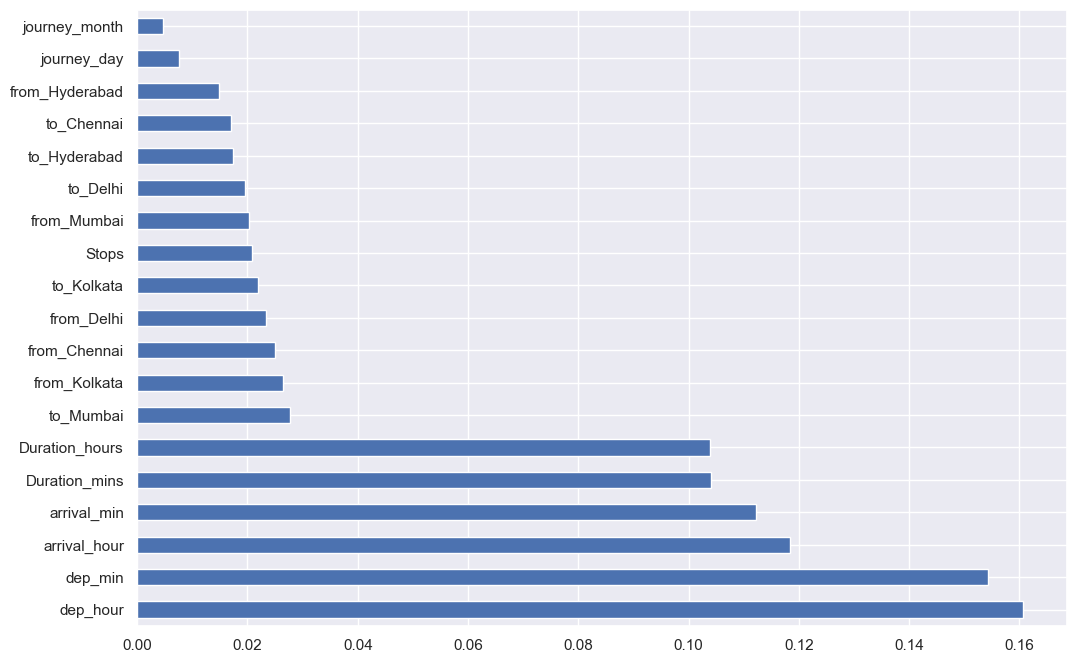

In [33]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [34]:
# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    # Calculating Variable Inflation Factor (VIF)
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [35]:
# Compute VIF on X
calc_vif(X)

,variables,VIF
0,journey_day,5.01
1,journey_month,17.96
2,dep_hour,6.57
3,dep_min,3.24
4,arrival_hour,6.41
5,arrival_min,3.53
6,Duration_hours,4.50
7,Duration_mins,3.27
8,Stops,7.16
9,from_Chennai,1.71


In [36]:
#pip install lazypredict

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
print('Model Performance on Training Set:', round(rf_reg.score(X_train, y_train)*100,2))
print('Model Performance on Test Set:', round(rf_reg.score(X_test, y_test)*100,2))

Model Performance on Training Set: 99.36
Model Performance on Test Set: 97.34


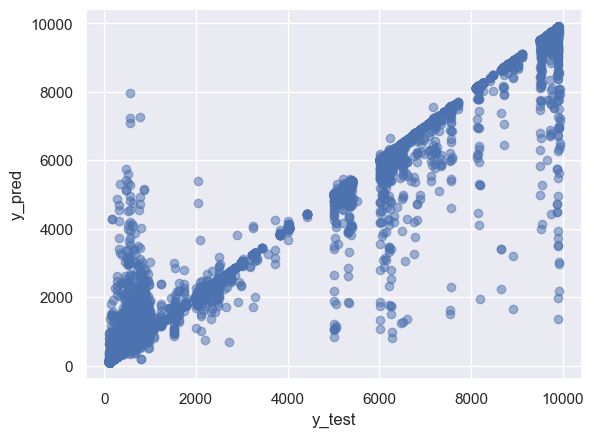

In [40]:
# Plot performance graph
y_pred = rf_reg.predict(X_test)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [41]:
# Model Error Values
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#RMSE = sqrt((PV-OV)^2/n)

MAE: 70.83047063335796
MSE: 144754.37473020912
RMSE: 380.46599681207925


In [42]:
# RMSE/(max(DV)-min(DV))
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

Normalized RMSE  0.04
Max Value:  9991 
Min Value:  101


In [43]:
import pickle
# open a file, where you ant to store the data
file = open('/Users/mythrikulkarni/Desktop/flightpriceprediction.pkl', 'wb')
# dump information to that file
pickle.dump(rf_reg, file)

In [44]:
import pickle
path = '/Users/mythrikulkarni/Desktop/flightpriceprediction2.pkl'
model = open(path,'rb')
rf_model = pickle.load(model)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mythrikulkarni/Desktop/flightpriceprediction2.pkl'